# Classical

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split 
from sklearn.datasets import make_blobs 
from sklearn import svm

from W_unitary import *
from U_unitary import *

%matplotlib inline
#plt.rcParams['figure.figsize'] = (10,6)
#plt.rcParams['figure.dpi'] = 100
#sns.set()

#%matplotlib inline
#%load_ext autoreload
#%autoreload 2

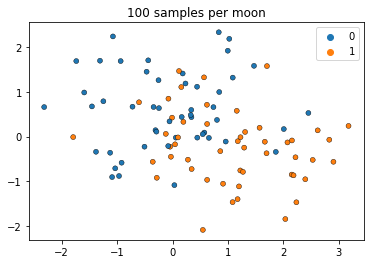

In [32]:
X, y = make_moons(n_samples=100, noise=0.8)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, marker="o", s=25, edgecolor="k", legend=True).set_title("100 samples per moon")
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [33]:
model = svm.LinearSVC()
model.fit(X_train, y_train)

LinearSVC()

In [34]:
def make_meshgrid(x1, x2, h=0.2):
    
    x1_min, x1_max = x1.min() - 1, x1.max() + 1
    x2_min, x2_max = x2.min() - 1, x2.max() + 1
    x1x1, x2x2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))
    
    return x1x1, x2x2


def plot_contours(ax, classifier, x1x1, x2x2, **params):

    contours = classifier.predict(np.c_[x1x1.ravel(), x2x2.ravel()])
    contours = contours.reshape(x1x1.shape)

    return ax.contourf(x1x1, x2x2, contours, **params)

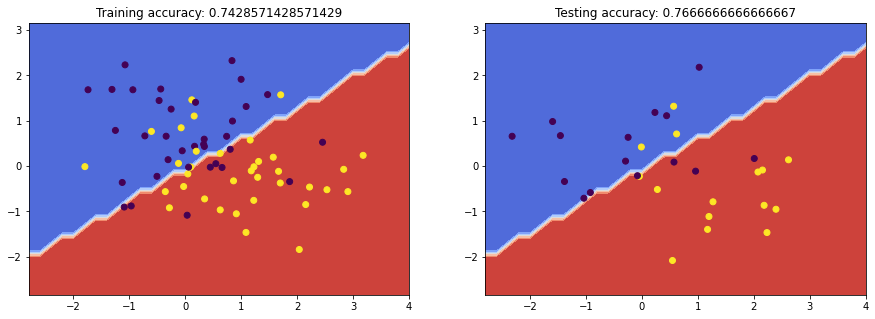

In [35]:
accuracy_train = model.score(X_train, y_train)
accuracy_test = model.score(X_test, y_test)

X_0, X_1 = X_train[:, 0], X_train[:, 1]
x1x1, x2x2 = make_meshgrid(X_0, X_1)
contours = model.predict(np.c_[x1x1.ravel(), x2x2.ravel()])
contours = contours.reshape(x1x1.shape)

fig,ax=plt.subplots(1,2,figsize=(15,5))
ax[0].contourf(x1x1, x2x2, contours, cmap=plt.cm.coolwarm)
ax[0].scatter(X_0, X_1, c=y_train)
ax[0].set_title('Training accuracy: '+ str(accuracy_train));

ax[1].contourf(x1x1, x2x2, contours, cmap=plt.cm.coolwarm)
ax[1].scatter(X_test[:,0], X_test[:,1], c=y_test)
ax[1].set_title('Testing accuracy: '+ str(accuracy_test));

In [36]:
classifier = svm.SVC(gamma = 'scale')
classifier.fit(X_train, y_train);

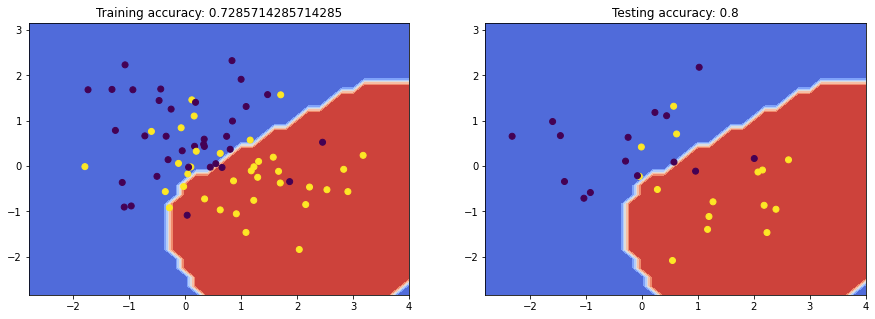

In [37]:
accuracy_train = classifier.score(X_train, y_train)
accuracy_test = classifier.score(X_test, y_test)


X_0, X_1 = X_train[:, 0], X_train[:, 1]
x1x1, x2x2 = make_meshgrid(X_0, X_1)
contours = classifier.predict(np.c_[x1x1.ravel(), x2x2.ravel()])
contours = contours.reshape(x1x1.shape)

fig,ax=plt.subplots(1,2,figsize=(15,5))
ax[0].contourf(x1x1, x2x2, contours, cmap=plt.cm.coolwarm)
ax[0].scatter(X_0, X_1, c=y_train)
ax[0].set_title('Training accuracy: '+ str(accuracy_train));

ax[1].contourf(x1x1, x2x2, contours, cmap=plt.cm.coolwarm)
ax[1].scatter(X_test[:,0], X_test[:,1], c=y_test)
ax[1].set_title('Testing accuracy: '+ str(accuracy_test));

# Quantum

In [42]:
from qiskit import QuantumCircuit
from qiskit.algorithms.optimizers import COBYLA, ADAM, SPSA, SLSQP, POWELL, L_BFGS_B, TNC, AQGD
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
from qiskit.quantum_info import Statevector

In [43]:
n = 2
d = 2
l = 2
Theta = np.round(np.random.rand(n,d,3),2)

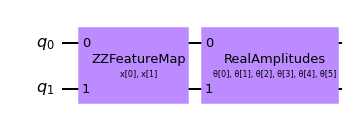

In [53]:
initial_sv = Statevector.from_label('0' * n)
u_encode = ZZFeatureMap(n, reps=d)
u_train = RealAmplitudes(n, reps=d)
ansatz = u_encode.compose(u_train)
ansatz.draw(output='mpl')#, filename="ansatz.png")

In [54]:
print(ansatz)

     ┌───┐┌──────────────┐                                           ┌───┐»
q_0: ┤ H ├┤ U1(2.0*x[0]) ├──■─────────────────────────────────────■──┤ H ├»
     ├───┤├──────────────┤┌─┴─┐┌───────────────────────────────┐┌─┴─┐├───┤»
q_1: ┤ H ├┤ U1(2.0*x[1]) ├┤ X ├┤ U1(2.0*(π - x[0])*(π - x[1])) ├┤ X ├┤ H ├»
     └───┘└──────────────┘└───┘└───────────────────────────────┘└───┘└───┘»
«     ┌──────────────┐                                           ┌──────────┐»
«q_0: ┤ U1(2.0*x[0]) ├──■─────────────────────────────────────■──┤ Ry(θ[0]) ├»
«     ├──────────────┤┌─┴─┐┌───────────────────────────────┐┌─┴─┐├──────────┤»
«q_1: ┤ U1(2.0*x[1]) ├┤ X ├┤ U1(2.0*(π - x[0])*(π - x[1])) ├┤ X ├┤ Ry(θ[1]) ├»
«     └──────────────┘└───┘└───────────────────────────────┘└───┘└──────────┘»
«          ┌──────────┐     ┌──────────┐
«q_0: ──■──┤ Ry(θ[2]) ├──■──┤ Ry(θ[4]) ├
«     ┌─┴─┐├──────────┤┌─┴─┐├──────────┤
«q_1: ┤ X ├┤ Ry(θ[3]) ├┤ X ├┤ Ry(θ[5]) ├
«     └───┘└──────────┘└───┘└──────────┘


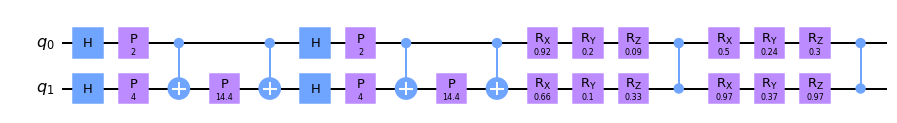

In [56]:
x = np.array([0.6,0.3])

qc = QuantumCircuit(n)
qc = U(qc,x,n,d)
qc = W(qc, Theta, n, l)

qc.draw('mpl')

In [57]:
print(qc)

     ┌───┐┌──────┐                       ┌───┐┌──────┐                       »
q_0: ┤ H ├┤ P(2) ├──■─────────────────■──┤ H ├┤ P(2) ├──■─────────────────■──»
     ├───┤├──────┤┌─┴─┐┌───────────┐┌─┴─┐├───┤├──────┤┌─┴─┐┌───────────┐┌─┴─┐»
q_1: ┤ H ├┤ P(4) ├┤ X ├┤ P(14.444) ├┤ X ├┤ H ├┤ P(4) ├┤ X ├┤ P(14.444) ├┤ X ├»
     └───┘└──────┘└───┘└───────────┘└───┘└───┘└──────┘└───┘└───────────┘└───┘»
«     ┌──────────┐┌─────────┐┌──────────┐   ┌─────────┐ ┌──────────┐»
«q_0: ┤ Rx(0.92) ├┤ Ry(0.2) ├┤ Rz(0.09) ├─■─┤ Rx(0.5) ├─┤ Ry(0.24) ├»
«     ├──────────┤├─────────┤├──────────┤ │ ├─────────┴┐├──────────┤»
«q_1: ┤ Rx(0.66) ├┤ Ry(0.1) ├┤ Rz(0.33) ├─■─┤ Rx(0.97) ├┤ Ry(0.37) ├»
«     └──────────┘└─────────┘└──────────┘   └──────────┘└──────────┘»
«     ┌─────────┐    
«q_0: ┤ Rz(0.3) ├──■─
«     ├─────────┴┐ │ 
«q_1: ┤ Rz(0.97) ├─■─
«     └──────────┘   


In [58]:
def assign_parameters(x, params):
    
    parameters = {}
    for i, p in enumerate(u_encode.ordered_parameters):
        parameters[p] = x[i]
    for i, p in enumerate(u_train.ordered_parameters):
        parameters[p] = params[i]
        
    return parameters

In [63]:
def assign_label(output, labels):
    
    hamming_weight = sum([int(b) for b in list(output)])
    is_odd_parity = hamming_weight & 1
    if is_odd_parity:
        
        return labels[1]
    else:
        
        return labels[0]

In [64]:
def probs(counts, labels):
    
    shots = sum(counts.values())
    result = {labels[0]: 0, labels[1]: 0}
    for key, item in counts.items():
        label = assign_label(key, labels)
        result[label] += counts[key]/shots
        
    return result

In [66]:
def classify(X, params, labels):
    
    QC = []
    for x in X:
        circ = circuit.assign_parameters(assign_parameters(x, params))
        qc = intial_sv.evolve(circ)
        QC += [qc]
    probs = []
    for qc in QC:
        counts = qc.to_counts()
        prob = probs(counts, labels)
        probs += [prob]
        
    return probs